# Experiments for the 2D Eiknonal equation in a square

This corresponds to the first numerical experiment in the paper

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_cube import plot_2d_proj
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD


dim = 2

side_length = 6.

from PointSampling.Cube import data_gen_cube
domain = data_gen_cube(side_length, dim)

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0

In [2]:
from Training.training import train
from error_test.cube_error import error_cube


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u term
    'lambda': 1. #weight parameter for the boundary loss
    }

delta_list = [.75, .5, .3, .1, .05]
alpha_list = [2.5, 2., 1.5, 1., .5]
rounds = len(delta_list)

N_col_list = [60]*rounds
N_b_list = [20]*rounds
num_iterations_list = [1000]*rounds

100%|██████████| 1000/1000 [00:00<00:00, 1293.45it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


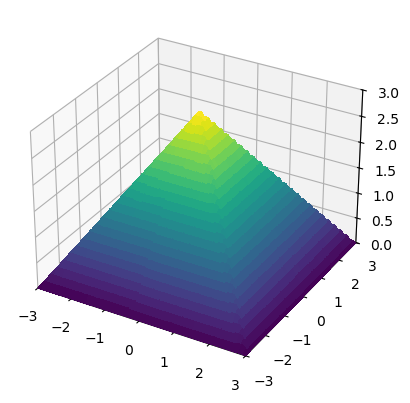

Mean square error: tensor(1.5788e-05)
L-infinity error: tensor(0.0133)
Run time: tensor(3.9712)


100%|██████████| 1000/1000 [00:00<00:00, 1284.43it/s]


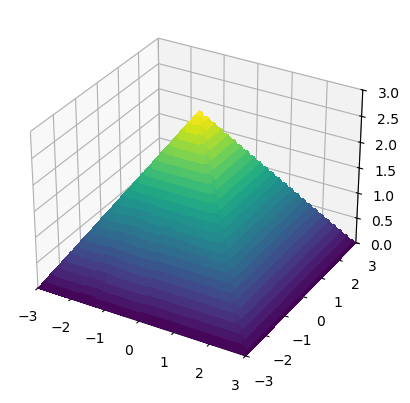

Mean square error: tensor(1.4163e-05)
L-infinity error: tensor(0.0119)
Run time: tensor(3.9181)


100%|██████████| 1000/1000 [00:00<00:00, 1261.18it/s]


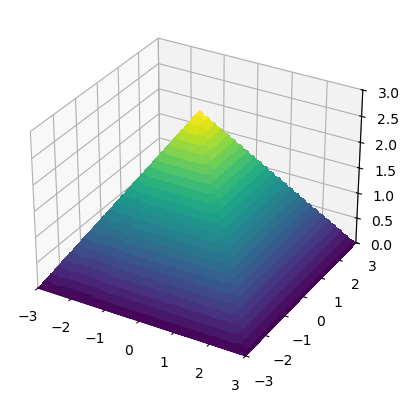

Mean square error: tensor(8.4392e-06)
L-infinity error: tensor(0.0101)
Run time: tensor(3.9116)


100%|██████████| 1000/1000 [00:00<00:00, 1281.38it/s]


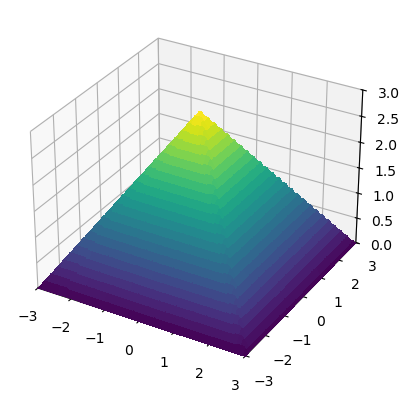

Mean square error: tensor(2.3188e-05)
L-infinity error: tensor(0.0131)
Run time: tensor(4.0023)


100%|██████████| 1000/1000 [00:00<00:00, 1257.53it/s]


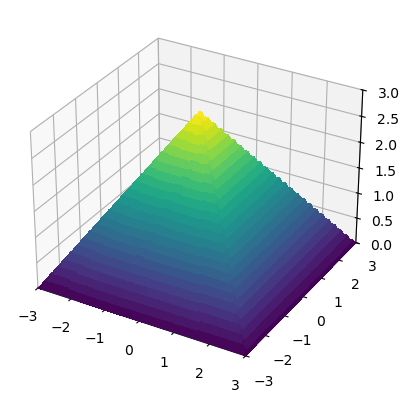

Mean square error: tensor(1.3710e-05)
L-infinity error: tensor(0.0109)
Run time: tensor(4.0136)


100%|██████████| 1000/1000 [00:00<00:00, 1257.21it/s]


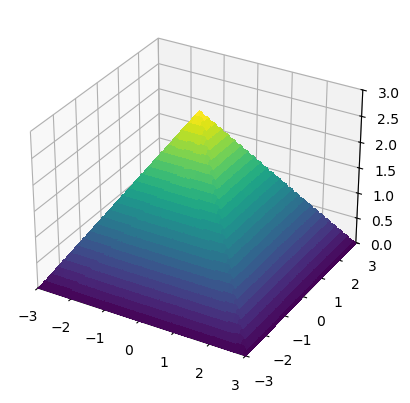

Mean square error: tensor(1.8026e-05)
L-infinity error: tensor(0.0134)
Run time: tensor(3.9519)


100%|██████████| 1000/1000 [00:00<00:00, 1218.56it/s]


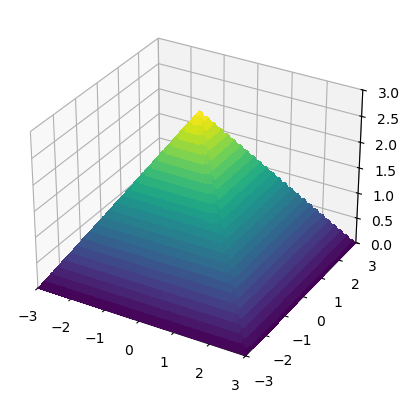

Mean square error: tensor(1.9065e-05)
L-infinity error: tensor(0.0147)
Run time: tensor(4.1489)


100%|██████████| 1000/1000 [00:00<00:00, 1226.95it/s]


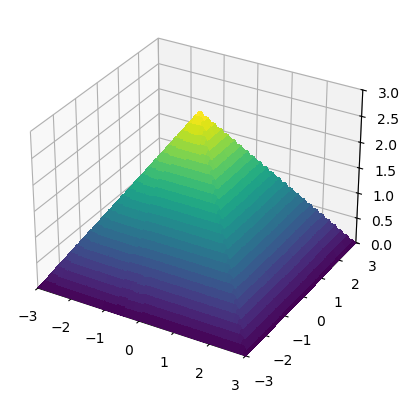

Mean square error: tensor(2.6825e-05)
L-infinity error: tensor(0.0139)
Run time: tensor(4.0849)


100%|██████████| 1000/1000 [00:00<00:00, 1193.62it/s]


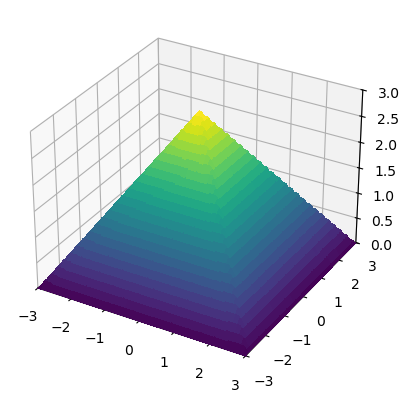

Mean square error: tensor(1.5460e-05)
L-infinity error: tensor(0.0145)
Run time: tensor(4.1795)


100%|██████████| 1000/1000 [00:00<00:00, 1161.33it/s]


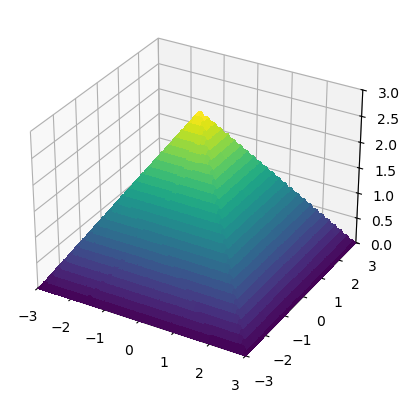

Mean square error: tensor(1.3328e-05)
L-infinity error: tensor(0.0135)
Run time: tensor(4.1517)


In [3]:
from NeuralNetworks.NNs import FCFF_2L

n_experiments = 10

MSE_history = torch.zeros([n_experiments, rounds])
L_inf_error_history = torch.zeros([n_experiments, rounds])
run_time_history = torch.zeros([n_experiments, rounds])

for j in range(n_experiments):

    # We define the NN
    NN = FCFF_2L([dim,20])
    training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)

    X_axis = 0
    Y_axis = 1
    n_grid = 100
    #plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)

    for i in range(rounds):
        
        training_params['alpha'] = alpha_list[i]
        training_params['delta'] = delta_list[i]
        training_params['n_coloc_points'] = N_col_list[i]
        training_params['n_boundary_points'] = N_b_list[i]
        training_params['num_iterations'] = num_iterations_list[i]
        
        t0 = t()
        total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
        t1 = t() - t0 
        
        
        MC_points = int(1e5) # Number of grid points for comparison with the ground truth
        MSE, L_inf = error_cube(NN, side_length, MC_points)
        
        MSE_history[j, i] = MSE
        L_inf_error_history[j, i] = L_inf
        run_time_history[j, i] = t1
        
        X_axis = 0
        Y_axis = 1
    
        n_grid = 100
    plot_2d_proj(X_axis, Y_axis, NN, n_grid, side_length)
    
    print('Mean square error:', MSE)
    print('L-infinity error:', L_inf)
    print('Run time:', run_time_history[j].sum())

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_23516\3493352029.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_23516\3493352029.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


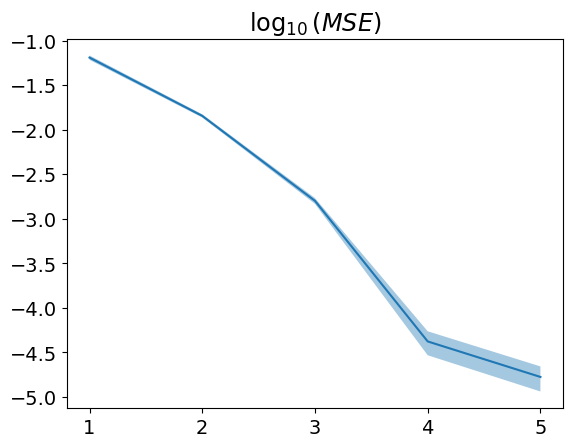

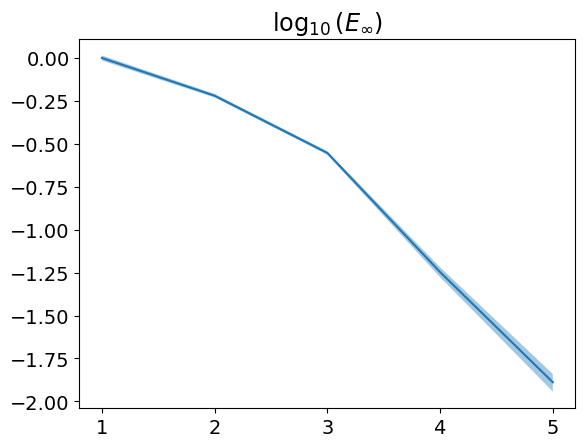

In [4]:
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot


x = np.arange(rounds) + 1
MSE = MSE_history.mean(dim = 0)
MSE_std = MSE_history.std(dim = 0)

ax = host_subplot(111)
ax.plot(x, MSE.log10())
ax.fill_between(x,
                (MSE - MSE_std).log10(),
                (MSE + MSE_std).log10(),
                alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.show()


L_inf = L_inf_error_history.mean(dim = 0)
L_inf_std = L_inf_error_history.std(dim = 0)
ax = host_subplot(111)
ax.plot(x, L_inf.log10())
ax.fill_between(x,
               (L_inf - L_inf_std).log10(),
               (L_inf + L_inf_std).log10(),
               alpha = .4)
ax.set_xticks(x)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.show()

In [5]:
MSE_average = MSE_history.mean(0)
MSE_std = MSE_history.std(0)

Linf_average = L_inf_error_history.mean(0)
Linf_std = L_inf_error_history.std(0)
import pandas as pd
import numpy as np

training_features = pd.DataFrame({'delta': delta_list,
                                  'alpha': alpha_list,
                                  'N': N_col_list,
                                  'N_b': N_b_list,
                                  'Iterations': num_iterations_list,
                                  'MSE': np.array(MSE_average),
                                  'MSE std': np.array(MSE_std),
                                  'L_inf': np.array(Linf_average),
                                  'L_inf std': np.array(Linf_std)
                                 })

display(training_features.transpose())

,0,1,2,3,4
delta,0.750000,0.500000,0.300000,0.100000,0.050000
alpha,2.500000,2.000000,1.500000,1.000000,0.500000
N,60.000000,60.000000,60.000000,60.000000,60.000000
N_b,20.000000,20.000000,20.000000,20.000000,20.000000
Iterations,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
MSE,0.064656,0.014335,0.001593,0.000042,0.000017
MSE std,0.003638,0.000609,0.000119,0.000013,0.000005
L_inf,1.003831,0.604867,0.280532,0.056723,0.012929
L_inf std,0.034067,0.014710,0.006539,0.003773,0.001511


<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\usuario\AppData\Local\Temp\ipykernel_23516\1532672091.py:4: SyntaxWarning: invalid escape sequence '\i'
  plt.legend(['MSE', '$L^\infty$-error'])


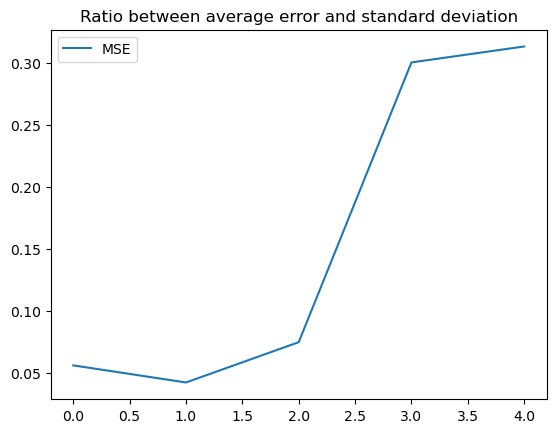

In [6]:
plt.plot(MSE_std/MSE_average)
#plt.plot(Linf_std/Linf_average)
plt.title('Ratio between average error and standard deviation')
plt.legend(['MSE', '$L^\infty$-error'])